# F 분포

스튜던트-t 분포와 카이 제곱 분포는 가우시안 정규 분포를 따르는 확률 변수 $X$로부터 나온 $N$개의 표본에서 만들 수 있었다.

이와 비슷하게 **카이 제곱 분포를 따르는 독립적인 두 개의 확률 변수 $\chi^2_1(x;N_1)$와 $\chi^2_2(x;N_2)$의 확률 변수 표본을 각각 $x_1$, $x_2$이라고 할 때 이를 각각 $N_1$, $N_2$로 나눈 뒤 비율을 구하면 $F(x;N_1, N_2)$ 분포**가 된다. $N_1$, $N_2$는 F 분포의 자유도 모수라고 한다.

$$ x_1, x_2 \sim \chi^2 \;\; \rightarrow \;\; \dfrac{x_1 / N_1}{x_2/ N_2} \sim F(x; N_1, N_2) $$

F 분포의 확률밀도함수는 다음과 같다.

$$ 
f(x; N_1,N_2) = \dfrac{\sqrt{\dfrac{(N_1\,x)^{N_1}\,\,N_2^{N_2}} {(N_1\,x+N_2)^{N_1+N_2}}}} {x\;\text{B}\left(\frac{N_1}{2},\frac{N_2}{2}\right)} 
$$

이 식에서 함수 $B(x)$는 베타(Beta) 함수라는 특수 함수이다.

SciPy stats 서브패키지의 `f` 클래스는 F 분포를 지원한다. 다음 그림에서 몇가지 자유도 쌍에 대한 F 분포의 모양을 보이고 있다.

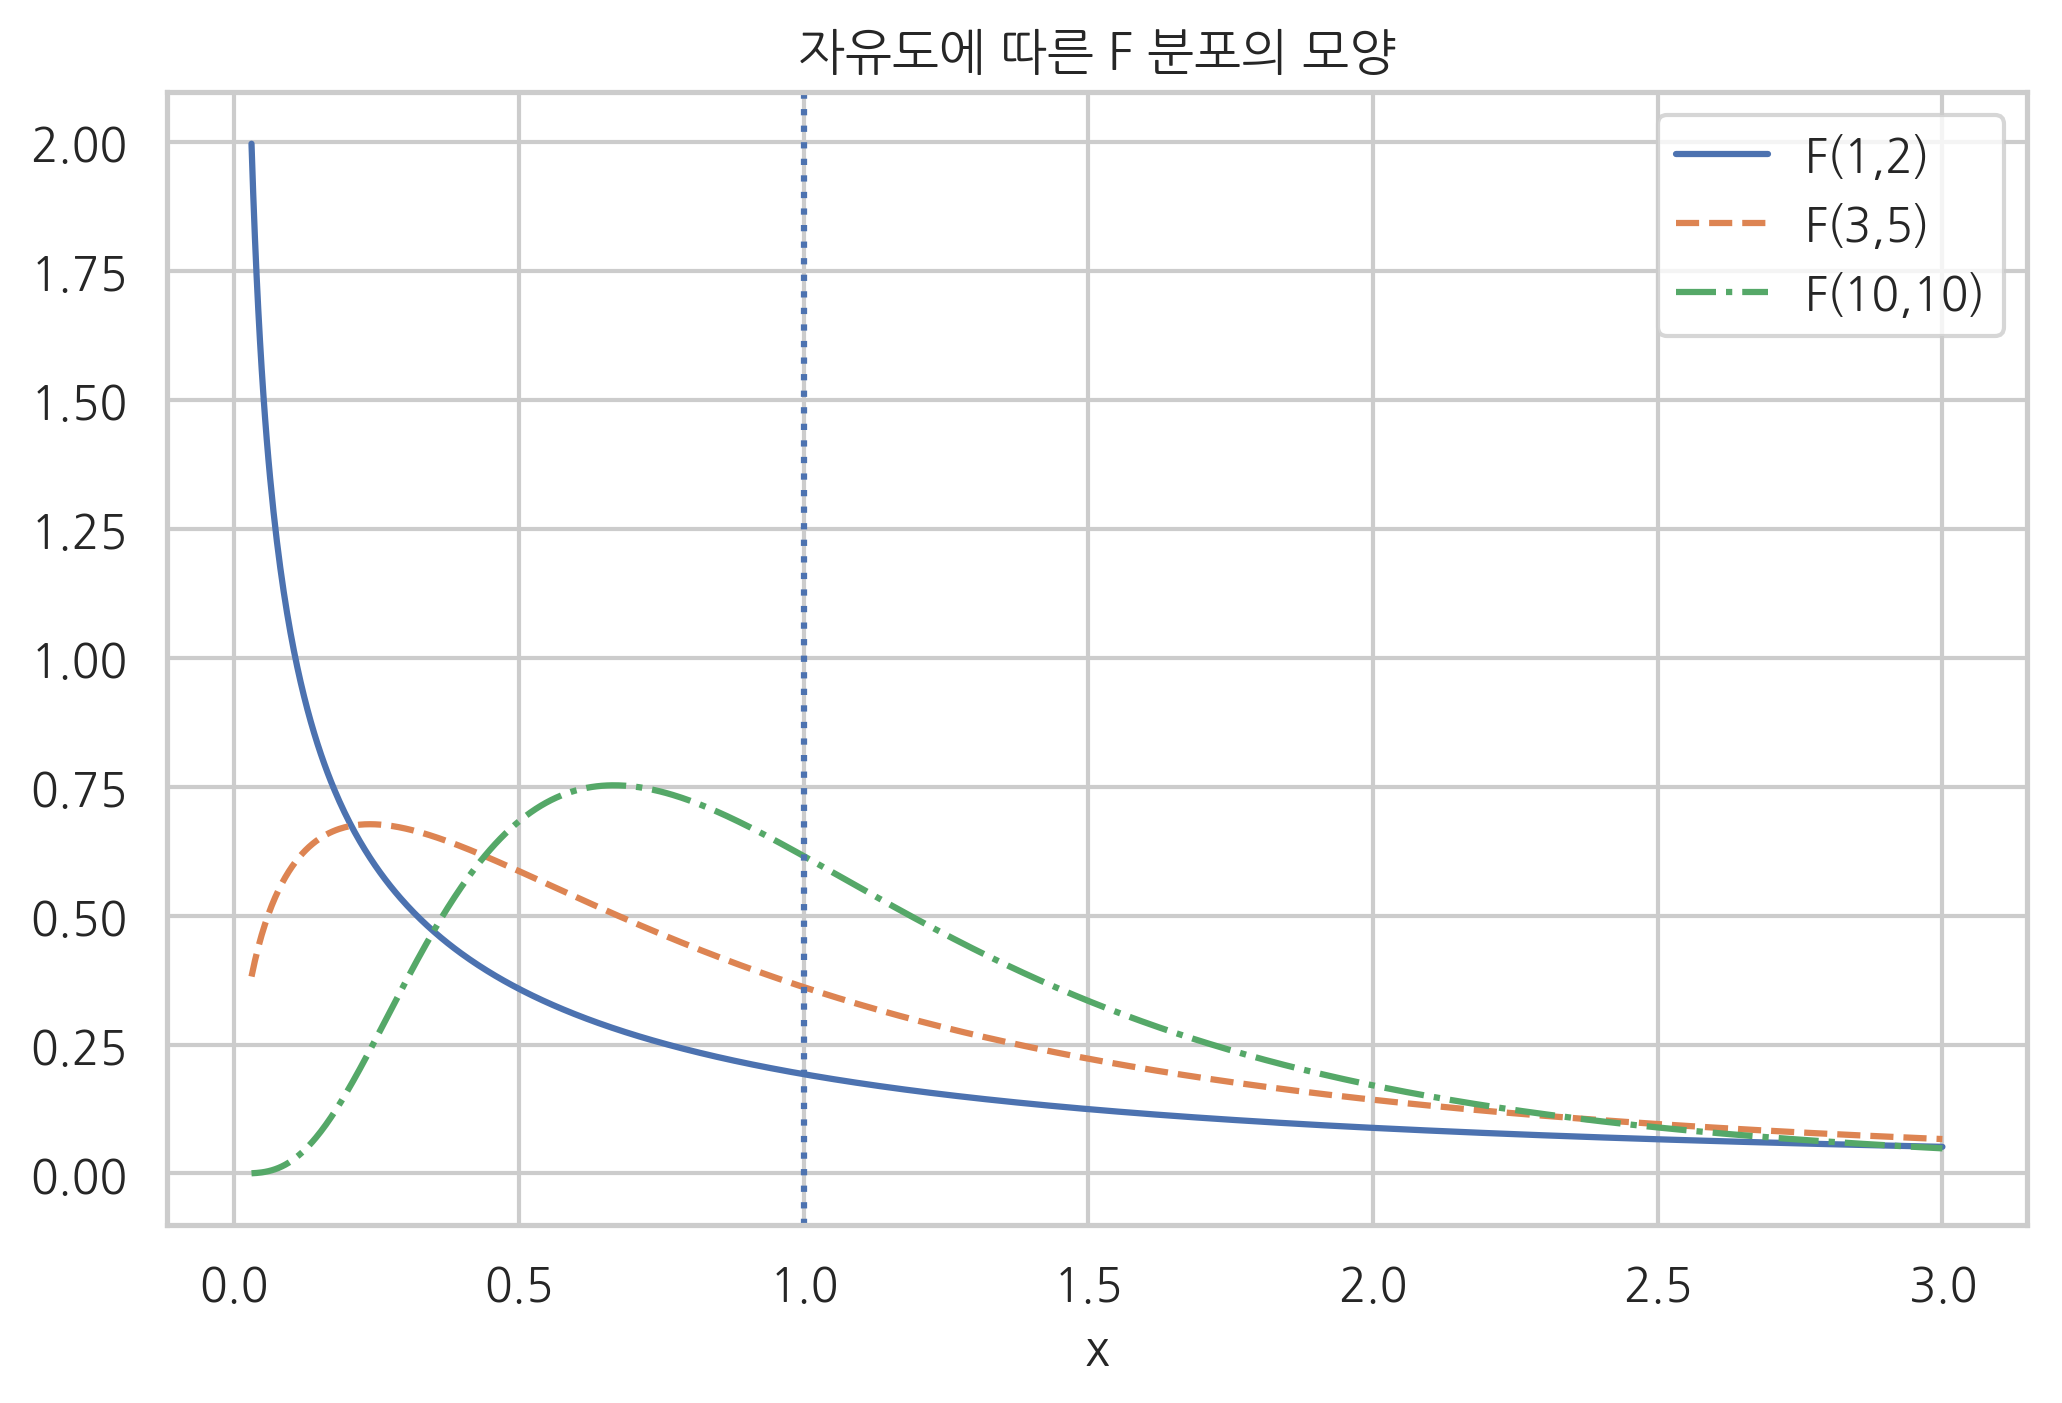

In [1]:
xx = np.linspace(0.03, 3, 1000)
plt.plot(xx, sp.stats.f(1, 2).pdf(xx), ls="-", label="F(1,2)")
plt.plot(xx, sp.stats.f(3, 5).pdf(xx), ls="--", label="F(3,5)")
plt.plot(xx, sp.stats.f(10, 10).pdf(xx), ls="-.", label="F(10,10)")
plt.axvline(1, ls=":")
plt.xlabel("x")
plt.title("자유도에 따른 F 분포의 모양")
plt.legend()
plt.show()

F 분포에서 특이한 점은 $N_1$과 $N_2$의 값이 같을 경우 $1$ 근처의 값이 가장 많이 발생할 것이라는 직관과 달리 $1$ 이 아닌 다른 수가 더 흔하게 발생한다는 점이다. 시뮬레이션을 통해 실제로 제곱합의 비율의 분포를 살펴보면 다음과 같다.

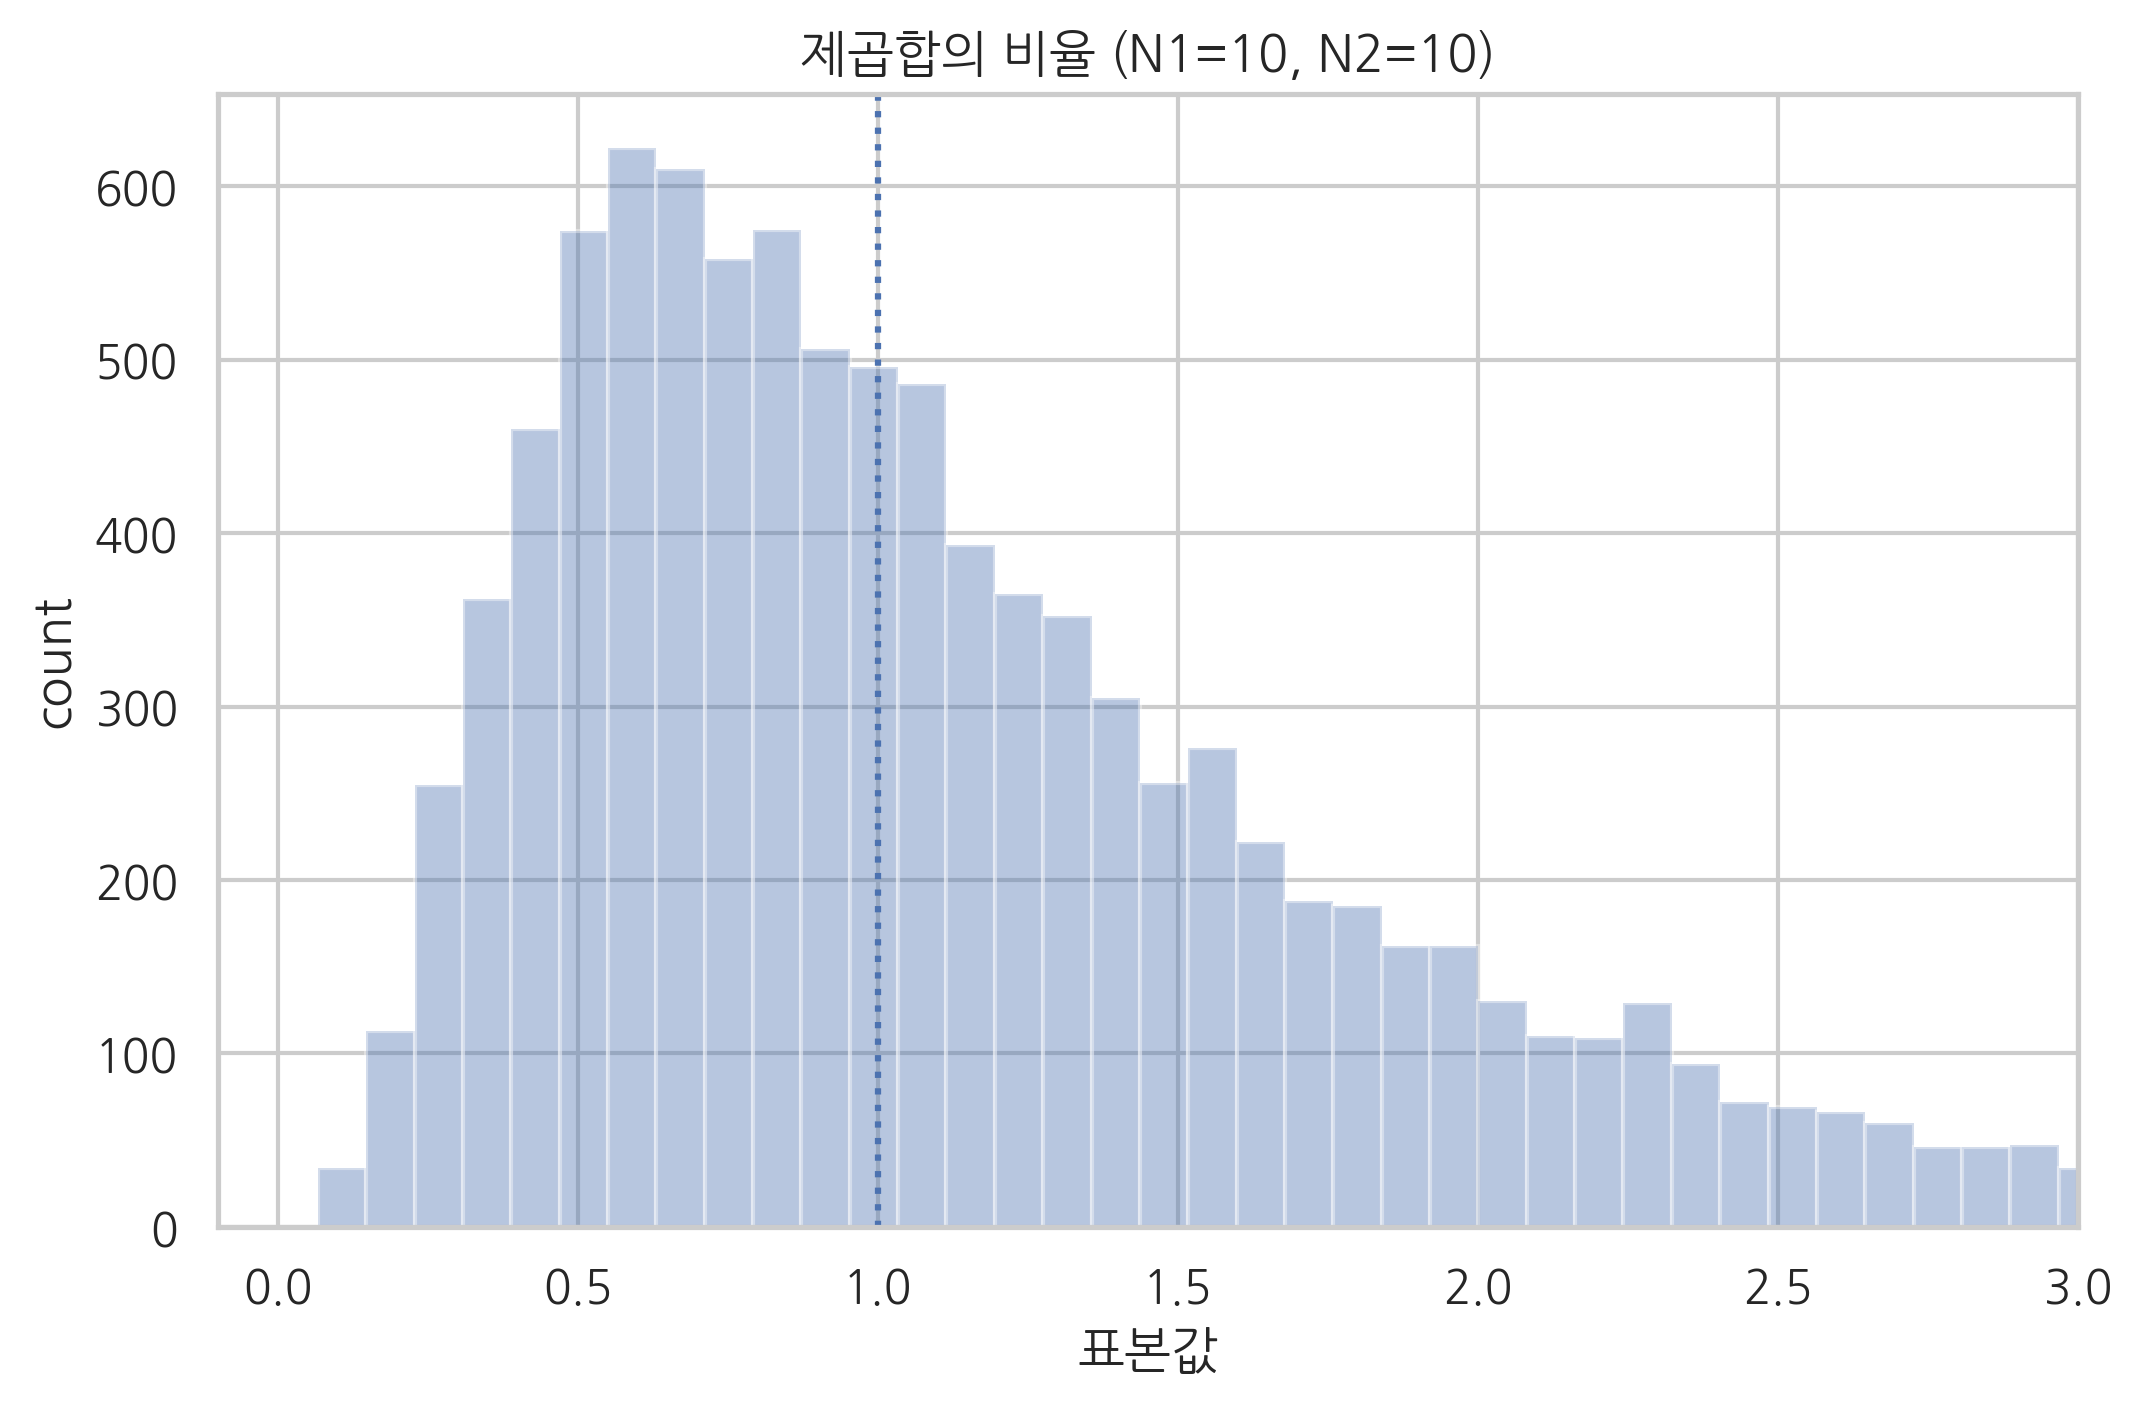

In [2]:
np.random.seed(0)

rv = sp.stats.norm()
M = 10000

N1 = 10
x1 = rv.rvs((N1, M))
t1 = (x1 ** 2).sum(axis=0)

N2 = 10
x2 = rv.rvs((N2, M))
t2 = (x2 ** 2).sum(axis=0)

t = t2 / t1
sns.distplot(t, bins=200, kde=False)
plt.axvline(1, ls=":");
plt.xlim(-0.1, 3)
plt.title("제곱합의 비율 (N1=10, N2=10)")
plt.xlabel("표본값")
plt.ylabel("count")
plt.show()

## 스튜던트 t 분포와의 관계

스튜던트 t 분포의 표본 값을 제곱한 값은 F-분포를 따른다.

$$ t(N)^2 = F(1, N) $$

#### 연습 문제 8.3.3

$N$이 다음과 같을 때 스튜던트 t 분포에서 나온 값의 제곱이 이루는 분포를 시뮬레이션으로 구하고 그 히스토그램을 $(1,N)-$자유도의 F-분포와 비교하라.

1. $N=2$일 때
2. $N=30$일 때